In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt


sgd_fs = [f for f in os.listdir() if f.endswith('.npy') and ('sgd_precision.' in f) and 'only' not in f and '2f' not in f and 'LIRA' not in f]
sgd_fs = sorted(sgd_fs, key=lambda x: float(x.split('_')[0]))
print(sgd_fs)

sgd_only_fs = [f for f in os.listdir() if f.endswith('.npy') and ('sgd_only' in f) and 'sc' not in f and '2f' not in f and 'LIRA' not in f and 'drift' not in f]
sgd_only_fs = sorted(sgd_only_fs, key=lambda x: float(x.split('_')[0]))
print(sgd_only_fs)

sgd_fs_LIRA = [f for f in os.listdir() if f.endswith('.npy') and ('sgd_r' in f) and 'LIRA' in f]
sgd_fs_LIRA = sorted(sgd_fs_LIRA, key=lambda x: float(x.split('_')[0]))
print(sgd_fs_LIRA)

sgd_only_fs_LIRA = [f for f in os.listdir() if f.endswith('.npy') and ('sgd_only' in f) and 'LIRA' in f]
sgd_only_fs_LIRA = sorted(sgd_only_fs_LIRA, key=lambda x: float(x.split('_')[0]))
print(sgd_only_fs_LIRA)



['250_sgd_precision.npy', '500_sgd_precision.npy', '1000_sgd_precision.npy', '2000_sgd_precision.npy', '4000_sgd_precision.npy', '8000_sgd_precision.npy']
['250_sgd_only_precision.npy', '500_sgd_only_precision.npy', '1000_sgd_only_precision.npy', '2000_sgd_only_precision.npy', '4000_sgd_only_precision.npy', '8000_sgd_only_precision.npy']
['250_25000_sgd_sgd_rnft_LIRA.npy', '500_25000_sgd_sgd_rnft_LIRA.npy', '1000_25000_sgd_sgd_rnft_LIRA.npy', '2000_25000_sgd_sgd_rnft_LIRA.npy', '4000_25000_sgd_sgd_rnft_LIRA.npy', '8000_25000_sgd_sgd_rnft_LIRA.npy']
['250_25000_sgd_sgd_only_rnft_LIRA.npy', '500_25000_sgd_sgd_only_rnft_LIRA.npy', '1000_25000_sgd_sgd_only_rnft_LIRA.npy', '2000_25000_sgd_sgd_only_rnft_LIRA.npy', '4000_25000_sgd_sgd_only_rnft_LIRA.npy', '8000_25000_sgd_sgd_only_rnft_LIRA.npy']


In [2]:
losses = [np.load(file, allow_pickle=True)[0] for file in sgd_fs]
gap = [np.load(file, allow_pickle=True)[1] for file in sgd_fs]
ratio = [np.load(file, allow_pickle=True)[2] for file in sgd_fs]
lira = [np.load(file, allow_pickle=True)[0] for file in sgd_fs_LIRA]
lira_ratio = [np.load(file, allow_pickle=True)[1] for file in sgd_fs_LIRA]

losses_shadow = [np.load(file, allow_pickle=True)[3] for file in sgd_fs]
ratio_shadow = [np.load(file, allow_pickle=True)[4] for file in sgd_fs]

loss_precision = [np.load(file, allow_pickle=True)[5] for file in sgd_fs]
ratio_precision = [np.load(file, allow_pickle=True)[6] for file in sgd_fs]

loss_precision_calibrate = [np.load(file, allow_pickle=True)[7] for file in sgd_fs]
ratio_precision_calibrate = [np.load(file, allow_pickle=True)[8] for file in sgd_fs]

loss_precision_shadow = [np.load(file, allow_pickle=True)[9] for file in sgd_fs]
ratio_precision_shadow = [np.load(file, allow_pickle=True)[10] for file in sgd_fs]

lira_precision = [np.load(file, allow_pickle=True)[2] for file in sgd_fs_LIRA]
lira_ratio_precision = [np.load(file, allow_pickle=True)[3] for file in sgd_fs_LIRA]

nup_losses = [np.load(file, allow_pickle=True)[11] for file in sgd_fs]
nup_gap = [np.load(file, allow_pickle=True)[12] for file in sgd_fs]

nup_losses_shadow = [np.load(file, allow_pickle=True)[13] for file in sgd_fs]

nup_loss_precision = [np.load(file, allow_pickle=True)[14] for file in sgd_fs]

nup_loss_precision_shadow = [np.load(file, allow_pickle=True)[15] for file in sgd_fs]

nup_loss_precision_calibrate = [np.load(file, allow_pickle=True)[16] for file in sgd_fs]

nup_lira = [np.load(file, allow_pickle=True)[4] for file in sgd_fs_LIRA]
nup_lira_precision = [np.load(file, allow_pickle=True)[5] for file in sgd_fs_LIRA]

initial_train_acc = [np.load(file, allow_pickle=True)[17] for file in sgd_fs]
initial_test_acc = [np.load(file, allow_pickle=True)[18] for file in sgd_fs]
post_train_acc = [np.load(file, allow_pickle=True)[19] for file in sgd_fs]
post_test_acc = [np.load(file, allow_pickle=True)[20] for file in sgd_fs]

print([np.mean(x) for x in lira])

[0.5406666666666666, 0.5432, 0.5426833333333334, 0.5439166666666666, 0.5426749999999999, nan]


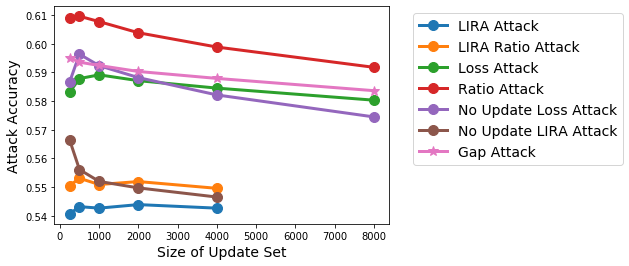

In [3]:
ds = [250, 500, 1000, 2000, 4000, 8000]

plt.plot(ds, [np.mean(x) for x in lira], 
         'o', label='LIRA Attack', 
         linestyle='-', linewidth=3, markersize=10)
plt.plot(ds, [np.mean(x) for x in lira_ratio], 
         'o', label='LIRA Ratio Attack', 
         linestyle='-', linewidth=3, markersize=10)
plt.plot(ds, [np.mean(x) for x in losses], 
         'o', label='Loss Attack', 
         linestyle='-', linewidth=3, markersize=10)
plt.plot(ds, [np.mean(x) for x in ratio], 
         'o', label='Ratio Attack', 
         linestyle='-', linewidth=3, markersize=10)
plt.plot(ds, [np.mean(x) for x in nup_losses], 
         'o', label='No Update Loss Attack', 
         linestyle='-', linewidth=3, markersize=10)
plt.plot(ds, [np.mean(x) for x in nup_lira], 
         'o', label='No Update LIRA Attack', 
         linestyle='-', linewidth=3, markersize=10)
plt.plot(ds, [np.mean(x) for x in gap], 
         '*', label='Gap Attack', 
         linestyle='-', linewidth=3, markersize=10)
plt.xlabel('Size of Update Set', fontsize=14)
plt.ylabel('Attack Accuracy', fontsize=14) 
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=14)
# plt.savefig('cifar_condensed_sgd.png')
plt.show()

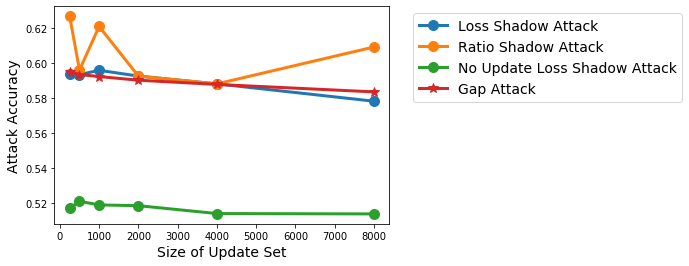

In [4]:
plt.plot(ds, [np.mean(x) for x in losses_shadow], 
         'o', label='Loss Shadow Attack', 
         linestyle='-', linewidth=3, markersize=10)
plt.plot(ds, [np.mean(x) for x in ratio_shadow], 
         'o', label='Ratio Shadow Attack', 
         linestyle='-', linewidth=3, markersize=10)
plt.plot(ds, [np.mean(x) for x in nup_losses_shadow], 
         'o', label='No Update Loss Shadow Attack', 
         linestyle='-', linewidth=3, markersize=10)
plt.plot(ds, [np.mean(x) for x in gap], 
         '*', label='Gap Attack', 
         linestyle='-', linewidth=3, markersize=10)
plt.xlabel('Size of Update Set', fontsize=14)
plt.ylabel('Attack Accuracy', fontsize=14) 
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=14)
plt.savefig('cifar_shadow_condensed_sgd.png')
plt.show()

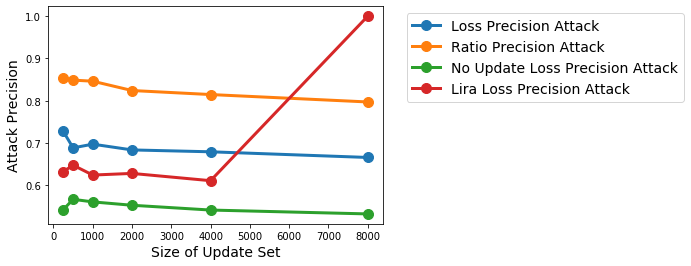

In [5]:
plt.plot(ds, [np.mean([i[0] for i in x]) for x in loss_precision], 
         'o', label='Loss Precision Attack', 
         linestyle='-', linewidth=3, markersize=10)
plt.plot(ds, [np.mean([i[0] for i in x]) for x in ratio_precision], 
         'o', label='Ratio Precision Attack', 
         linestyle='-', linewidth=3, markersize=10)
plt.plot(ds, [np.mean([i[0] for i in x]) for x in nup_loss_precision], 
         'o', label='No Update Loss Precision Attack', 
         linestyle='-', linewidth=3, markersize=10)
plt.plot(ds, [np.mean([i[0] for i in x]) for x in lira_precision], 
         'o', label='Lira Loss Precision Attack', 
         linestyle='-', linewidth=3, markersize=10)
plt.xlabel('Size of Update Set', fontsize=14)
plt.ylabel('Attack Precision', fontsize=14) 
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=14)
plt.savefig('cifar_precision_condensed_sgd.png')
plt.show()

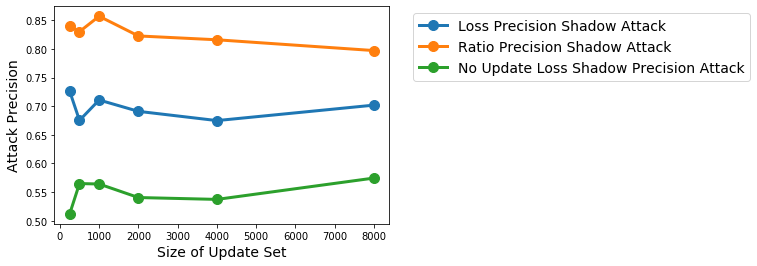

In [6]:
plt.plot(ds, [np.nanmean([i[0] for i in x]) for x in loss_precision_shadow], 
         'o', label='Loss Precision Shadow Attack', 
         linestyle='-', linewidth=3, markersize=10)
plt.plot(ds, [np.nanmean([i[0] for i in x]) for x in ratio_precision_shadow], 
         'o', label='Ratio Precision Shadow Attack', 
         linestyle='-', linewidth=3, markersize=10)
plt.plot(ds, [np.nanmean([i[0] for i in x]) for x in nup_loss_precision_shadow], 
         'o', label='No Update Loss Shadow Precision Attack', 
         linestyle='-', linewidth=3, markersize=10)
plt.xlabel('Size of Update Set', fontsize=14)
plt.ylabel('Attack Precision', fontsize=14) 
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=14)
plt.savefig('cifar_shadow_precision_condensed_sgd.png')
plt.show()

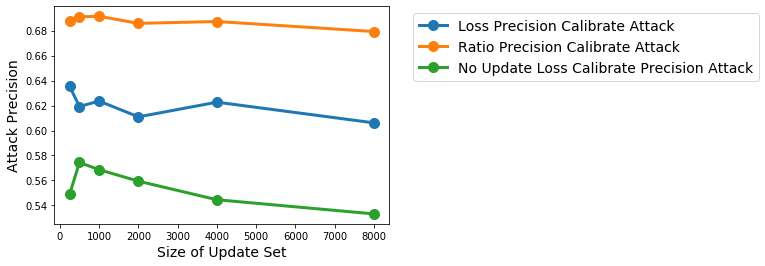

In [7]:
plt.plot(ds, [np.nanmean([i[1][0] for i in x]) for x in loss_precision_calibrate], 
         'o', label='Loss Precision Calibrate Attack', 
         linestyle='-', linewidth=3, markersize=10)
plt.plot(ds, [np.nanmean([i[1][0] for i in x]) for x in ratio_precision_calibrate], 
         'o', label='Ratio Precision Calibrate Attack', 
         linestyle='-', linewidth=3, markersize=10)
plt.plot(ds, [np.nanmean([i[1][0] for i in x]) for x in nup_loss_precision_calibrate], 
         'o', label='No Update Loss Calibrate Precision Attack', 
         linestyle='-', linewidth=3, markersize=10)
plt.xlabel('Size of Update Set', fontsize=14)
plt.ylabel('Attack Precision', fontsize=14) 
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=14)
plt.savefig('cifar_calibrate_precision_condensed_sgd.png')
plt.show()

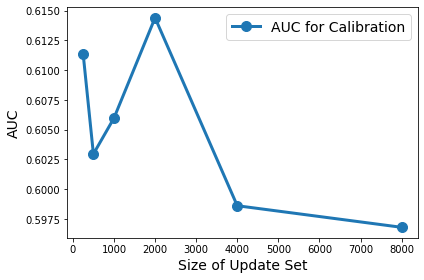

0.6113873839613547 0.614394669753631


In [8]:
from sklearn.metrics import auc

total_precisions = [[np.nanmean([i[percentile][0] for i in x]) for percentile in range(11)] for x in loss_precision_calibrate]
total_recalls = [[np.nanmean([i[percentile][1] for i in x]) for percentile in range(11)] for x in loss_precision_calibrate]
aucs = []

for precisions, recalls in zip(total_precisions, total_recalls):
#     print(precisions)
#     print(recalls)
#     print('===============')
    aucs.append(auc(recalls, precisions))
    
plt.plot(ds, aucs, 
         'o', label='AUC for Calibration', 
         linestyle='-', linewidth=3, markersize=10)
plt.xlabel('Size of Update Set', fontsize=14)
plt.ylabel('AUC', fontsize=14) 
plt.legend(fontsize=14)
plt.tight_layout()
plt.show()

print(aucs[0], aucs[3])

In [9]:
losses = [np.load(file, allow_pickle=True)[0] for file in sgd_only_fs]
gap = [np.load(file, allow_pickle=True)[1] for file in sgd_only_fs]
ratio = [np.load(file, allow_pickle=True)[2] for file in sgd_only_fs]
lira = [np.load(file, allow_pickle=True)[0] for file in sgd_only_fs_LIRA]
lira_ratio = [np.load(file, allow_pickle=True)[1] for file in sgd_only_fs_LIRA]

losses_shadow = [np.load(file, allow_pickle=True)[3] for file in sgd_only_fs]
ratio_shadow = [np.load(file, allow_pickle=True)[4] for file in sgd_only_fs]

loss_precision = [np.load(file, allow_pickle=True)[5] for file in sgd_only_fs]
ratio_precision = [np.load(file, allow_pickle=True)[6] for file in sgd_only_fs]

loss_precision_calibrate = [np.load(file, allow_pickle=True)[7] for file in sgd_only_fs]
ratio_precision_calibrate = [np.load(file, allow_pickle=True)[8] for file in sgd_only_fs]

loss_precision_shadow = [np.load(file, allow_pickle=True)[9] for file in sgd_only_fs]
ratio_precision_shadow = [np.load(file, allow_pickle=True)[10] for file in sgd_only_fs]

lira_precision = [np.load(file, allow_pickle=True)[2] for file in sgd_only_fs_LIRA]
lira_ratio_precision = [np.load(file, allow_pickle=True)[3] for file in sgd_only_fs_LIRA]

nup_losses = [np.load(file, allow_pickle=True)[11] for file in sgd_only_fs]
nup_gap = [np.load(file, allow_pickle=True)[12] for file in sgd_only_fs]

nup_losses_shadow = [np.load(file, allow_pickle=True)[13] for file in sgd_only_fs]

nup_loss_precision = [np.load(file, allow_pickle=True)[14] for file in sgd_only_fs]

nup_loss_precision_shadow = [np.load(file, allow_pickle=True)[15] for file in sgd_only_fs]

nup_loss_precision_calibrate = [np.load(file, allow_pickle=True)[16] for file in sgd_only_fs]

nup_lira = [np.load(file, allow_pickle=True)[4] for file in sgd_only_fs_LIRA]
nup_lira_precision = [np.load(file, allow_pickle=True)[5] for file in sgd_only_fs_LIRA]

initial_train_acc = [np.load(file, allow_pickle=True)[17] for file in sgd_only_fs]
initial_test_acc = [np.load(file, allow_pickle=True)[18] for file in sgd_only_fs]
post_train_acc = [np.load(file, allow_pickle=True)[19] for file in sgd_only_fs]
post_test_acc = [np.load(file, allow_pickle=True)[20] for file in sgd_only_fs]

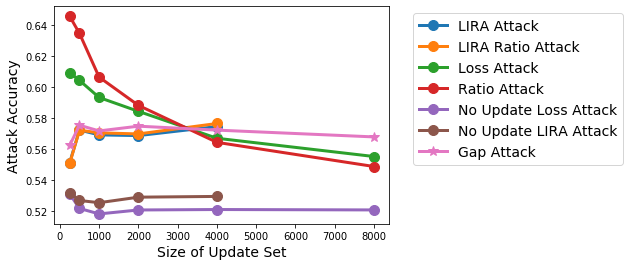

In [10]:
ds = [250, 500, 1000, 2000, 4000, 8000]

plt.plot(ds, [np.mean(x) for x in lira], 
         'o', label='LIRA Attack', 
         linestyle='-', linewidth=3, markersize=10)
plt.plot(ds, [np.mean(x) for x in lira_ratio], 
         'o', label='LIRA Ratio Attack', 
         linestyle='-', linewidth=3, markersize=10)
plt.plot(ds, [np.mean(x) for x in losses], 
         'o', label='Loss Attack', 
         linestyle='-', linewidth=3, markersize=10)
plt.plot(ds, [np.mean(x) for x in ratio], 
         'o', label='Ratio Attack', 
         linestyle='-', linewidth=3, markersize=10)
plt.plot(ds, [np.mean(x) for x in nup_losses], 
         'o', label='No Update Loss Attack', 
         linestyle='-', linewidth=3, markersize=10)
plt.plot(ds, [np.mean(x) for x in nup_lira], 
         'o', label='No Update LIRA Attack', 
         linestyle='-', linewidth=3, markersize=10)
plt.plot(ds, [np.mean(x) for x in gap], 
         '*', label='Gap Attack', 
         linestyle='-', linewidth=3, markersize=10)
plt.xlabel('Size of Update Set', fontsize=14)
plt.ylabel('Attack Accuracy', fontsize=14) 
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=14)
# plt.savefig('cifar_condensed_sgd_only.png')
plt.show()

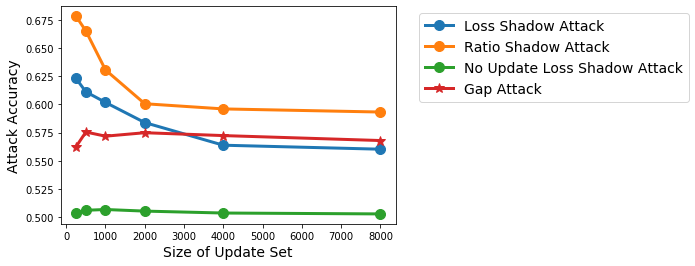

In [11]:
plt.plot(ds, [np.mean(x) for x in losses_shadow], 
         'o', label='Loss Shadow Attack', 
         linestyle='-', linewidth=3, markersize=10)
plt.plot(ds, [np.mean(x) for x in ratio_shadow], 
         'o', label='Ratio Shadow Attack', 
         linestyle='-', linewidth=3, markersize=10)
plt.plot(ds, [np.mean(x) for x in nup_losses_shadow], 
         'o', label='No Update Loss Shadow Attack', 
         linestyle='-', linewidth=3, markersize=10)
plt.plot(ds, [np.mean(x) for x in gap], 
         '*', label='Gap Attack', 
         linestyle='-', linewidth=3, markersize=10)
plt.xlabel('Size of Update Set', fontsize=14)
plt.ylabel('Attack Accuracy', fontsize=14) 
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=14)
plt.savefig('cifar_shadow_condensed_sgd_only.png')
plt.show()

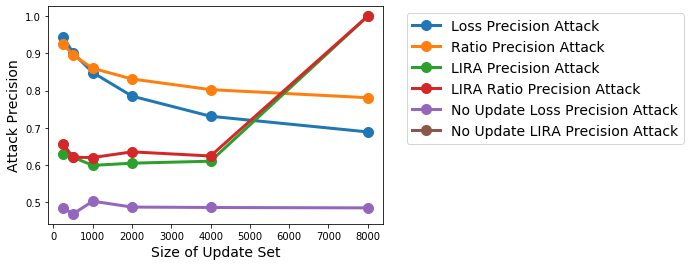

In [12]:
plt.plot(ds, [np.mean([i[0] for i in x]) for x in loss_precision], 
         'o', label='Loss Precision Attack', 
         linestyle='-', linewidth=3, markersize=10)
plt.plot(ds, [np.mean([i[0] for i in x]) for x in ratio_precision], 
         'o', label='Ratio Precision Attack', 
         linestyle='-', linewidth=3, markersize=10)
plt.plot(ds, [np.mean([i[0] for i in x]) for x in lira_precision], 
         'o', label='LIRA Precision Attack', 
         linestyle='-', linewidth=3, markersize=10)
plt.plot(ds, [np.mean([i[0] for i in x]) for x in lira_ratio_precision], 
         'o', label='LIRA Ratio Precision Attack', 
         linestyle='-', linewidth=3, markersize=10)
plt.plot(ds, [np.mean([i[0] for i in x]) for x in nup_loss_precision], 
         'o', label='No Update Loss Precision Attack', 
         linestyle='-', linewidth=3, markersize=10)
plt.plot(ds, [np.mean([i[0] for i in x]) for x in nup_lira_precision], 
         'o', label='No Update LIRA Precision Attack', 
         linestyle='-', linewidth=3, markersize=10)
plt.xlabel('Size of Update Set', fontsize=14)
plt.ylabel('Attack Precision', fontsize=14) 
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=14)
# plt.savefig('cifar_precision_condensed_sgd_only.png')
plt.show()

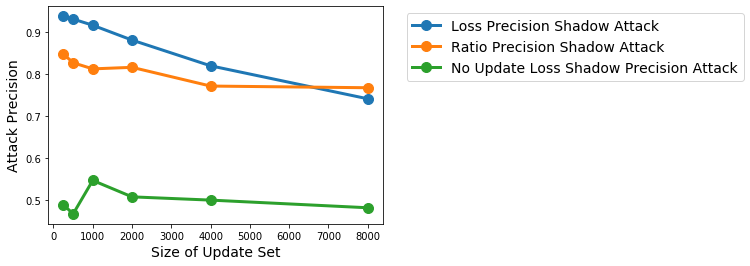

In [13]:
plt.plot(ds, [np.nanmean([i[0] for i in x]) for x in loss_precision_shadow], 
         'o', label='Loss Precision Shadow Attack', 
         linestyle='-', linewidth=3, markersize=10)
plt.plot(ds, [np.nanmean([i[0] for i in x]) for x in ratio_precision_shadow], 
         'o', label='Ratio Precision Shadow Attack', 
         linestyle='-', linewidth=3, markersize=10)
plt.plot(ds, [np.nanmean([i[0] for i in x]) for x in nup_loss_precision_shadow], 
         'o', label='No Update Loss Shadow Precision Attack', 
         linestyle='-', linewidth=3, markersize=10)
plt.xlabel('Size of Update Set', fontsize=14)
plt.ylabel('Attack Precision', fontsize=14) 
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=14)
plt.savefig('cifar_shadow_precision_condensed_sgd_only.png')
plt.show()

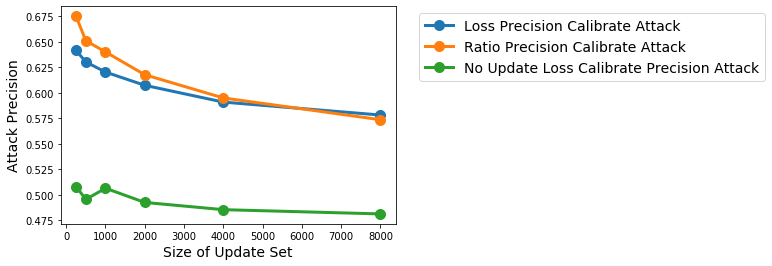

In [14]:
plt.plot(ds, [np.nanmean([i[2][0] for i in x]) for x in loss_precision_calibrate], 
         'o', label='Loss Precision Calibrate Attack', 
         linestyle='-', linewidth=3, markersize=10)
plt.plot(ds, [np.nanmean([i[2][0] for i in x]) for x in ratio_precision_calibrate], 
         'o', label='Ratio Precision Calibrate Attack', 
         linestyle='-', linewidth=3, markersize=10)
plt.plot(ds, [np.nanmean([i[2][0] for i in x]) for x in nup_loss_precision_calibrate], 
         'o', label='No Update Loss Calibrate Precision Attack', 
         linestyle='-', linewidth=3, markersize=10)
plt.xlabel('Size of Update Set', fontsize=14)
plt.ylabel('Attack Precision', fontsize=14) 
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=14)
plt.savefig('cifar_calibrate_precision_condensed_sgd_only.png')
plt.show()

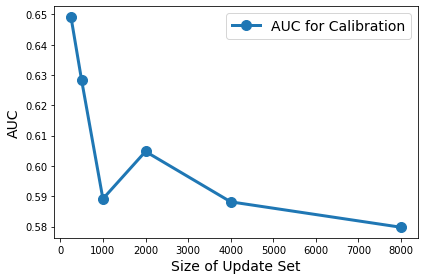

0.6491841949103031 0.604784621930649


In [15]:
from sklearn.metrics import auc

total_precisions = [[np.nanmean([i[percentile][0] for i in x]) for percentile in range(11)] for x in loss_precision_calibrate]
total_recalls = [[np.nanmean([i[percentile][1] for i in x]) for percentile in range(11)] for x in loss_precision_calibrate]
aucs = []

for precisions, recalls in zip(total_precisions, total_recalls):
#     print(precisions)
#     print(recalls)
#     print('===============')
    aucs.append(auc(recalls, precisions))
    
plt.plot(ds, aucs, 
         'o', label='AUC for Calibration', 
         linestyle='-', linewidth=3, markersize=10)
plt.xlabel('Size of Update Set', fontsize=14)
plt.ylabel('AUC', fontsize=14) 
plt.legend(fontsize=14)
plt.tight_layout()
plt.show()
print(aucs[0], aucs[3])

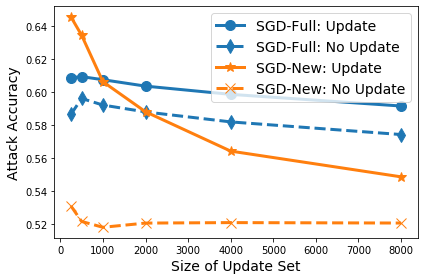

In [16]:
ds = [250, 500, 1000, 2000, 4000, 8000]

ratio_median_sgd = [np.load(file, allow_pickle=True)[2] for file in sgd_fs]
ratio_median_sgd_only = [np.load(file, allow_pickle=True)[2] for file in sgd_only_fs]
ratio_shadow_sgd = [np.load(file, allow_pickle=True)[4] for file in sgd_fs]
ratio_shadow_sgd_only = [np.load(file, allow_pickle=True)[4] for file in sgd_only_fs]
nup_losses_median_sgd = [np.load(file, allow_pickle=True)[11] for file in sgd_fs]
nup_losses_median_sgd_only = [np.load(file, allow_pickle=True)[11] for file in sgd_only_fs]

plt.plot(ds, [np.mean(x) for x in ratio_median_sgd], 
         'o', label='SGD-Full: Update', color='C0',
         linestyle='-', linewidth=3, markersize=10)
plt.plot(ds, [np.mean(x) for x in nup_losses_median_sgd], 
         'd', label='SGD-Full: No Update', color='C0',
         linestyle='--', linewidth=3, markersize=10)
plt.plot(ds, [np.mean(x) for x in ratio_median_sgd_only], 
         '*', label='SGD-New: Update', color='C1',
         linestyle='-', linewidth=3, markersize=10)
plt.plot(ds, [np.mean(x) for x in nup_losses_median_sgd_only], 
         'x', label='SGD-New: No Update', color='C1', 
         linestyle='--', linewidth=3, markersize=10)
plt.xlabel('Size of Update Set', fontsize=14)
plt.ylabel('Attack Accuracy', fontsize=14) 
plt.legend(fontsize=14)
plt.tight_layout()
plt.savefig('cifar_condensed.png')
plt.show()

In [17]:
nup_loss_precision = [np.load(file, allow_pickle=True)[14] for file in sgd_fs]
print(np.mean([x[0] for x in nup_loss_precision[0]]), np.mean([x[1] for x in nup_loss_precision[0]]))
print(np.mean([x[0] for x in nup_loss_precision[3]]), np.mean([x[1] for x in nup_loss_precision[3]]))
print('==================')

ratio_precision = [np.load(file, allow_pickle=True)[6] for file in sgd_fs]
print(np.mean([x[0] for x in ratio_precision[0]]), np.mean([x[1] for x in ratio_precision[0]]))
print(np.mean([x[0] for x in ratio_precision[3]]), np.mean([x[1] for x in ratio_precision[3]]))
print('==================')

ratio_precision_shadow = [np.load(file, allow_pickle=True)[10] for file in sgd_fs]
print(np.nanmean([x[0] for x in ratio_precision_shadow[0]]), np.nanmean([x[1] for x in ratio_precision_shadow[0]]))
print(np.nanmean([x[0] for x in ratio_precision_shadow[3]]), np.nanmean([x[1] for x in ratio_precision_shadow[3]]))
print('==================')

ratio_precision_calibrate = [np.load(file, allow_pickle=True)[8] for file in sgd_fs]
print(np.mean([x[1][0] for x in ratio_precision_calibrate[0]]), np.mean([x[1][1] for x in ratio_precision_calibrate[0]]))
print(np.mean([x[1][0] for x in ratio_precision_calibrate[3]]), np.mean([x[1][1] for x in ratio_precision_calibrate[3]]))
print('==================')

0.5423605442176871 0.10793333333333331
0.5526800105981914 0.11006666666666667
0.8536666666666666 0.1707333333333333
0.8242083333333334 0.16484166666666666
0.8397686721920969 0.20506666666666667
0.8226007492068828 0.17688333333333334
0.6880699745445976 0.4620666666666667
0.6858194245615242 0.4443166666666666


In [18]:
nup_loss_precision = [np.load(file, allow_pickle=True)[14] for file in sgd_only_fs]
print(np.mean([x[0] for x in nup_loss_precision[0]]), np.mean([x[1] for x in nup_loss_precision[0]]))
print(np.mean([x[0] for x in nup_loss_precision[3]]), np.mean([x[1] for x in nup_loss_precision[3]]))
print('==================')

ratio_precision = [np.load(file, allow_pickle=True)[6] for file in sgd_only_fs]
print(np.mean([x[0] for x in ratio_precision[0]]), np.mean([x[1] for x in ratio_precision[0]]))
print(np.mean([x[0] for x in ratio_precision[3]]), np.mean([x[1] for x in ratio_precision[3]]))
print('==================')

ratio_precision_shadow = [np.load(file, allow_pickle=True)[10] for file in sgd_only_fs]
print(np.nanmean([x[0] for x in ratio_precision_shadow[0]]), np.nanmean([x[1] for x in ratio_precision_shadow[0]]))
print(np.nanmean([x[0] for x in ratio_precision_shadow[3]]), np.nanmean([x[1] for x in ratio_precision_shadow[3]]))
print('==================')

ratio_precision_calibrate = [np.load(file, allow_pickle=True)[8] for file in sgd_only_fs]
print(np.mean([x[0][0] for x in ratio_precision_calibrate[0]]), np.mean([x[0][1] for x in ratio_precision_calibrate[0]]))
print(np.mean([x[0][0] for x in ratio_precision_calibrate[3]]), np.mean([x[0][1] for x in ratio_precision_calibrate[3]]))
print('==================')

0.4836530612244898 0.09666666666666665
0.48649048448172355 0.09725
0.9253333333333335 0.18506666666666666
0.8312083333333332 0.16624166666666665
0.8479757332021264 0.03126666666666667
0.815997683010535 0.07016666666666667
0.8308796359633092 0.45573333333333327
0.7714871813557894 0.3591999999999999


In [19]:
nup_gap = [np.load(file, allow_pickle=True)[12] for file in sgd_fs]
print(np.mean([x for x in nup_gap[0]]))
print('==================')

nup_losses = [np.load(file, allow_pickle=True)[11] for file in sgd_fs]
print(np.mean([x for x in nup_losses[0]]))
print('==================')

losses = [np.load(file, allow_pickle=True)[0] for file in sgd_fs]
print(np.nanmean([x for x in losses[0]]))
print('==================')

losses_shadow = [np.load(file, allow_pickle=True)[3] for file in sgd_fs]
print(np.mean([x for x in losses_shadow[0]]))
print('==================')

ratio = [np.load(file, allow_pickle=True)[2] for file in sgd_fs]
print(np.mean([x for x in ratio[0]]))
print('==================')

ratio_shadow = [np.load(file, allow_pickle=True)[4] for file in sgd_fs]
print(np.mean([x for x in ratio_shadow[0]]))
print('==================')

0.4960333333333334
0.5867333333333334
0.5831333333333332
0.5937666666666668
0.6089333333333333
0.6269666666666666


In [20]:
nup_gap = [np.load(file, allow_pickle=True)[12] for file in sgd_only_fs]
print(np.mean([x for x in nup_gap[0]]))
print('==================')

nup_losses = [np.load(file, allow_pickle=True)[11] for file in sgd_only_fs]
print(np.mean([x for x in nup_losses[0]]))
print('==================')

losses = [np.load(file, allow_pickle=True)[0] for file in sgd_only_fs]
print(np.nanmean([x for x in losses[0]]))
print('==================')

losses_shadow = [np.load(file, allow_pickle=True)[3] for file in sgd_only_fs]
print(np.mean([x for x in losses_shadow[0]]))
print('==================')

ratio = [np.load(file, allow_pickle=True)[2] for file in sgd_only_fs]
print(np.mean([x for x in ratio[0]]))
print('==================')

ratio_shadow = [np.load(file, allow_pickle=True)[4] for file in sgd_only_fs]
print(np.mean([x for x in ratio_shadow[0]]))
print('==================')

0.4960333333333334
0.5312
0.6094666666666667
0.6230000000000001
0.6458
0.6781666666666667


In [21]:
lira = [np.load(file, allow_pickle=True)[0] for file in sgd_fs_LIRA]
lira_ratio = [np.load(file, allow_pickle=True)[1] for file in sgd_fs_LIRA]
print(np.mean([x for x in lira[0]]))
print('==================')
print(np.mean([x for x in lira_ratio[0]]))
print('==================')

0.5406666666666667
0.5505333333333333


In [22]:
lira = [np.load(file, allow_pickle=True)[0] for file in sgd_only_fs_LIRA]
lira_ratio = [np.load(file, allow_pickle=True)[1] for file in sgd_only_fs_LIRA]
print(np.mean([x for x in lira[0]]))
print('==================')
print(np.mean([x for x in lira_ratio[0]]))
print('==================')

0.5513
0.5508000000000001
